# Desafio Evaluado S4

### Req 1 Evaluar juicios de hipótesis 

75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se
identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se
identificaron como heterosexuales. El objetivo era medir actitudes frente a la
adopción homoparental. La organización encargada de procesar los datos obtuvo
los siguientes resultados:

* El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identificaron como homosexuales se mostraron a favor de la adopción homoparental.

* Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.

* Con p-valor de 0.1183 ¿es posible rechazar la hipótesis nula en favor de la alternativa con una confianza de 95%?, ¿Cuanta es la confianza máxima con la que sería posible rechazar la hipótesis nula en favor de la alternativa con estos resultados?

------------------------------------------------------------------------------------------------

1. H0: El 67% no difiere del 72%
2. H1: Existe una diferencia substancial entre ambos

- Se permite rechazar la hipótesis nula, si 𝑝𝑣𝑎𝑙𝑢𝑒 ≤ 0.05

In [4]:
p_value = 0.1183
p_value <= 0.05

False

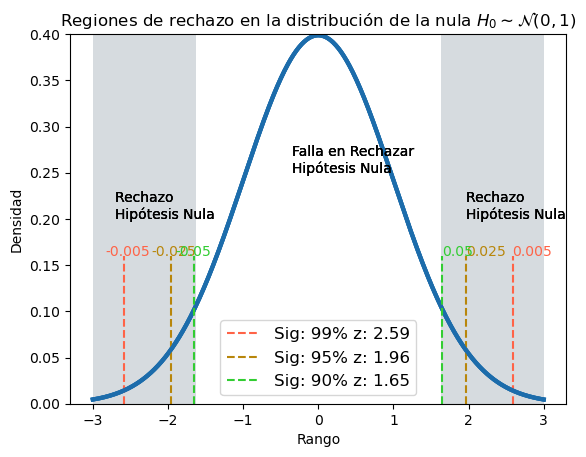

In [5]:
from graficos import graph_significance
graph_significance()


No se cumple pvalue <= 0.05 por lo que no se rechaza la hipotesis nula

In [6]:
p_value = 0.1183
evidencia_contra_H0 = 100 - (p_value* 100)
evidencia_contra_H0

88.17

Nuestro p value representa un 11.83 por ende con un 88.17 de confianza podriamos rechazar la hipotesis nula en favor de la hipotesis alternativa, es decir en pos de afirmar que la encuesta se vio afectada por la orientacion sexual del encuestador.

### Req 2: Importar la base de datos utilizada la sesión presencial anterior

* Agregue una serie de variables binarias por cada continente de la variable region.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# importamos seaborn, siguiendo la convención de renombrarlo como sns
import seaborn as sns
plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (7,4) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 100 # resolución gráficos

In [8]:
df = pd.read_csv('nations.csv', encoding='iso-8859-1')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


In [9]:
columnas_ap = ['adfert', 'chldmort', 'life']

In [10]:
regiones = df['region'].unique()
regiones

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

In [11]:
df['Africa'] = np.where(df['region']=='Africa',1,0)
df['Americas'] = np.where(df['region']=='Americas',1,0)
df['Asia'] = np.where(df['region']=='Asia',1,0)
df['Europe'] = np.where(df['region']=='Europe',1,0)
df['Oceania'] = np.where(df['region']=='Oceania',1,0)

In [12]:
df['region'].value_counts()

Africa      52
Asia        49
Europe      43
Americas    35
Oceania     15
Name: region, dtype: int64

In [13]:
# Verificar valores
#df['Africa'].value_counts()
#df['Americas'].value_counts()
#df['Asia'].value_counts()
#df['Europe'].value_counts()
df['Oceania'].value_counts()

0    179
1     15
Name: Oceania, dtype: int64

### Req 3 Implementar una función de prueba de hipótesis a mano 

* La función debe ingresar los siguientes argumentos:
    - df: La tabla de datos.
    - variable: La variable a analizar.
    - binarize: El indicador binario a utilizar.

* Compararemos la media de la poblacion completa versus la media de nuestra muestra por continente donde:
    - H0: No hay diferencia entre la media de cada continente vs la media fuera de este
    - H1: La media continental difiere de la del resto de continentes juntos

In [14]:
col_binarias = ['Africa',
'Americas',
'Asia',
'Europe',
'Oceania']
columnas_ap = ['adfert', 'chldmort', 'life']

In [37]:
def prueba_hip(df, variable, binarize, significacion=0.05):
    continental = df[df[binarize]==1][variable].dropna().copy()
    no_continental = df[df[binarize]==0][variable].dropna().copy()
    diff = no_continental.mean() - continental.mean()

    puntaje_t, p_value = stats.ttest_ind(continental,no_continental)
    evaluar_p = p_value<=significacion
    resultado = ['Rechazo' if evaluar_p else 'No rechazo']
    print(f'''
    Variable: {variable}   Continente: {binarize}
    ------------------------------------------------------
    Media {binarize}: {np.round(continental.mean(),3)}
    Media fuera de {binarize}: {np.round(no_continental.mean(),3)}
    Diferencia entre medias: {np.round(diff,3)}
    Funcion ttest para medias independientes
    estadistico t: {puntaje_t}
    p value: {p_value} <= {significacion}: {p_value<=significacion}
    {resultado[0]} H0: No hay diferencia entre la media de cada 
                continente vs la media fuera de este
    ------------------------------------------------------
    ''')

In [39]:
for columnas in columnas_ap:
    for bin in col_binarias:
        prueba_hip(df, columnas, bin)
        


    Variable: adfert   Continente: Africa
    ------------------------------------------------------
    Media Africa: 92.721
    Media fuera de Africa: 36.835
    Diferencia entre medias: -55.887
    Funcion ttest para medias independientes
    estadistico t: 9.444409431356496
    p value: 1.2481674170069097e-17 <= 0.05: True
    Rechazo H0: No hay diferencia entre la media de cada 
                continente vs la media fuera de este
    ------------------------------------------------------
    

    Variable: adfert   Continente: Americas
    ------------------------------------------------------
    Media Americas: 63.66
    Media fuera de Americas: 49.207
    Diferencia entre medias: -14.453
    Funcion ttest para medias independientes
    estadistico t: 1.7662790555775358
    p value: 0.07893816171889229 <= 0.05: False
    No rechazo H0: No hay diferencia entre la media de cada 
                continente vs la media fuera de este
    -------------------------------------------

### Req 4: 

4. Implementar una función que grafique los histogramas para ambas muestras

* Genere una función que devuelva un gráfico donde visualice los dos histogramas cuando la variable es 1 y 0, respectivamente.

In [18]:
def medias_continental_hist(df, variable, binarize):
    continental = df[df[binarize]==1][variable].dropna().copy()
    no_continental = df[df[binarize]==0][variable].dropna().copy()

    fig, ax = plt.subplots(ncols=1, sharex=True ,sharey=True)

    sns.histplot(continental, ax=ax, color='yellow', label=binarize, stat='density')
    sns.histplot(no_continental, ax=ax, color='silver', label='Otros', stat='density')
    ax.vlines(continental.mean(),*ax.get_ylim(),color='green',alpha=0.6,ls='--', linewidth=2, label=f'Prom. {binarize} {continental.mean():.2f}')
    ax.vlines(no_continental.mean(), *ax.get_ylim(), color='orchid',alpha=0.6,ls='--', linewidth=2, label=f'Prom. otros {no_continental.mean():.2f}')
    ax.set_title(f'{variable} en {binarize} vs. el resto del mundo')
    plt.legend()

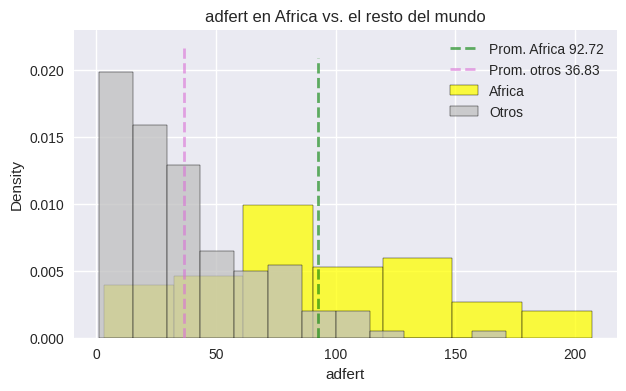

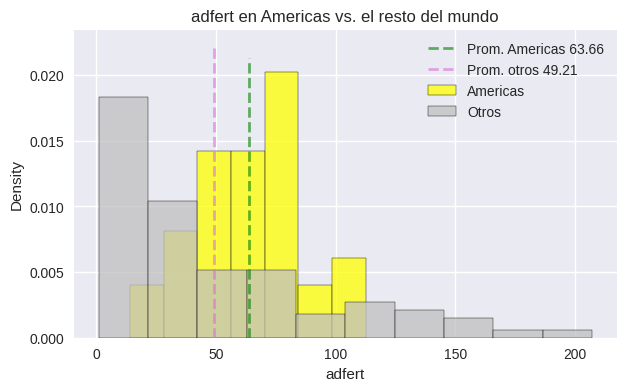

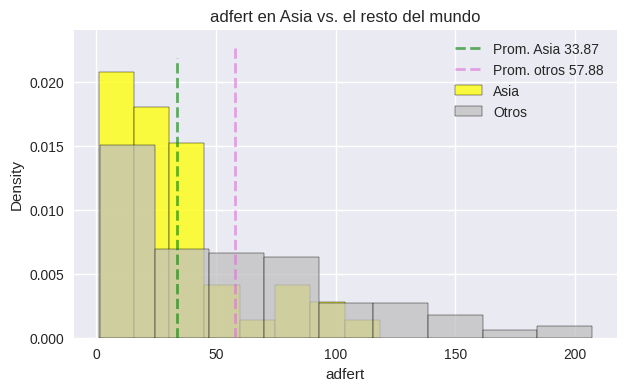

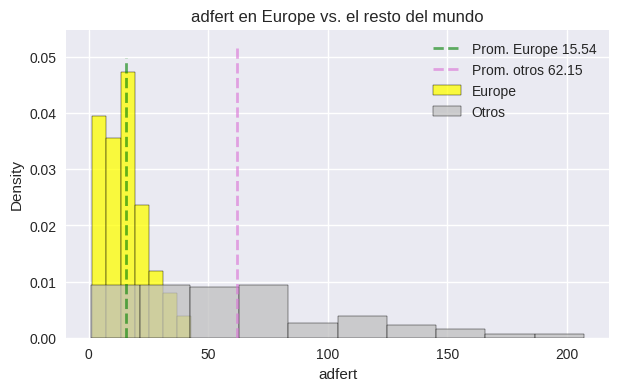

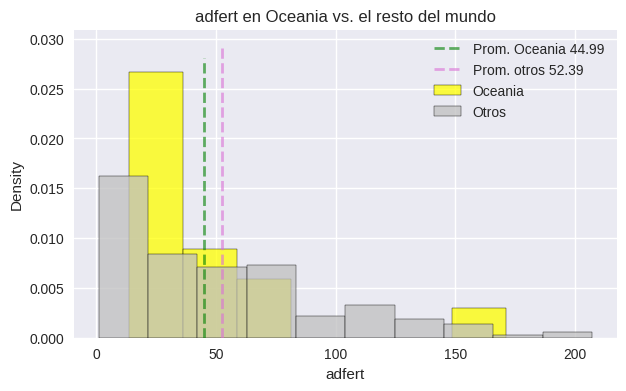

In [40]:
for continente in col_binarias:
    medias_continental_hist(df, columnas_ap[0], continente)

##### La fertilidad adolecente en Europa es la mas baja de 15.54, ademas en concentracion de la muestra tambien muestra valores bajos. vs. el resto del mundo, por otro lado africa marca el mayor valor promediado de 92.72, cabe destacar la dispersion de la muestra en Africa.


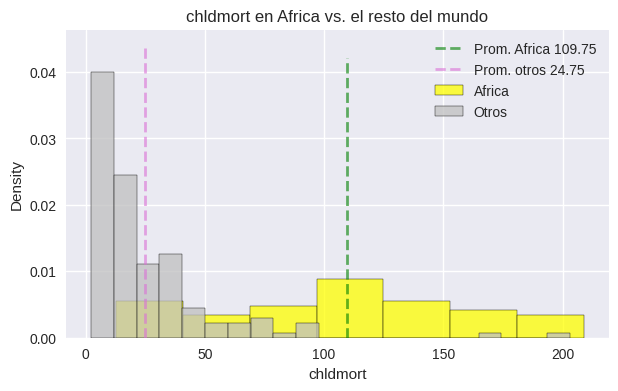

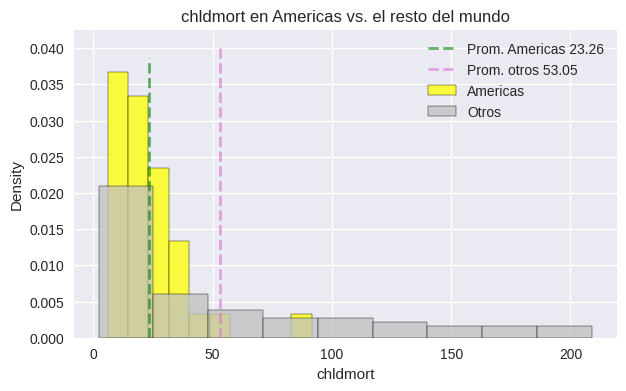

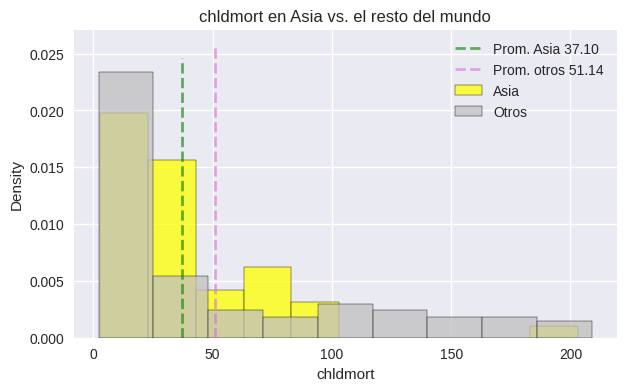

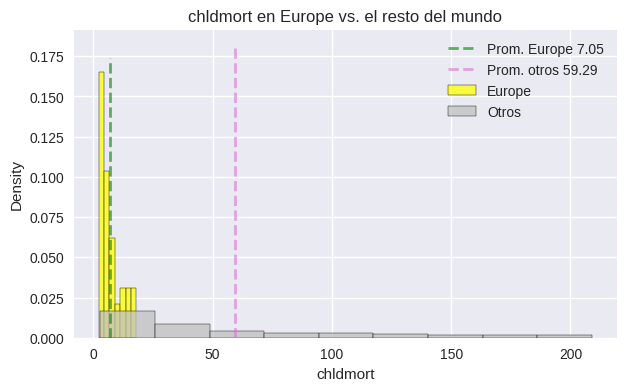

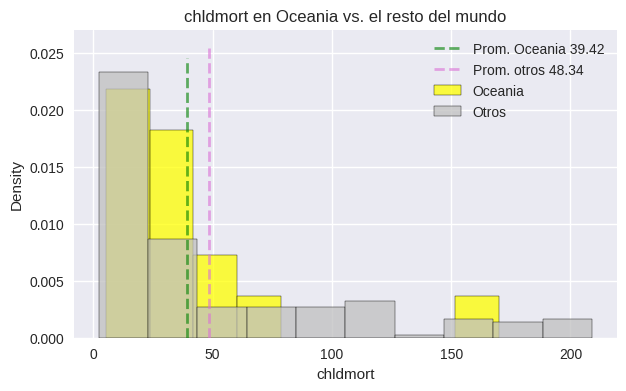

In [41]:
for continente in col_binarias:
    medias_continental_hist(df, columnas_ap[1], continente)

##### Destacar a Europa nuevamente con su casi nula mortandad infantil, la dispersion de los datos en africa y las barras de densidad lejos del resto de la densidad en oceania y asia, lo que nos indica que hay eventos asociados a paises donde se dispara muy hacia arriba el valor.


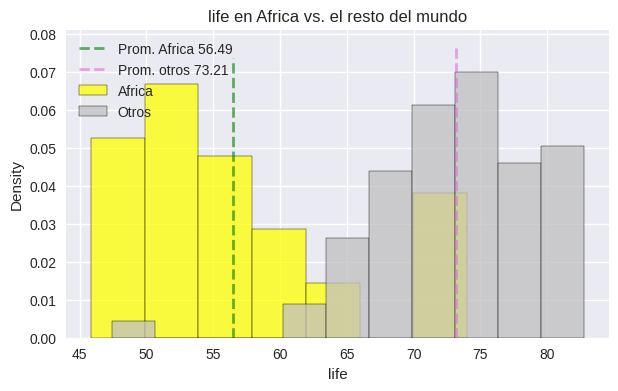

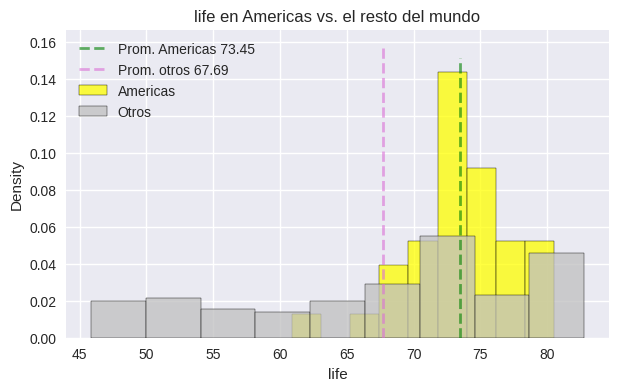

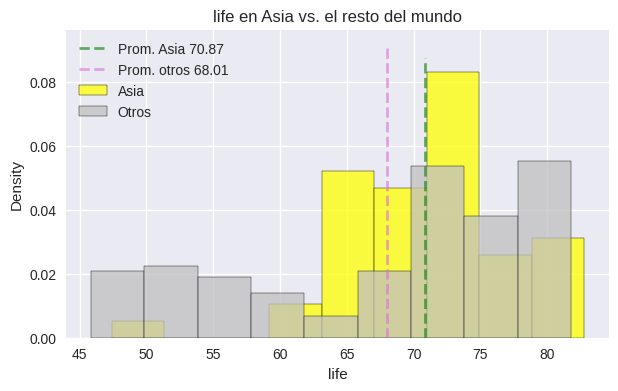

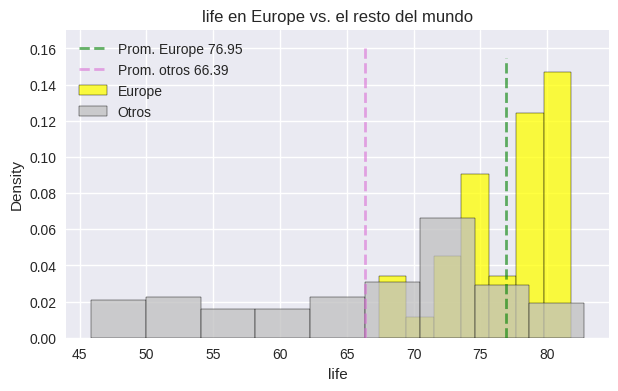

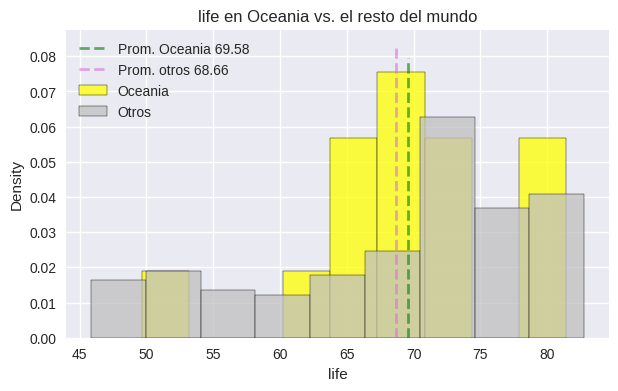

In [42]:
for continente in col_binarias:
    medias_continental_hist(df, columnas_ap[2], continente)

##### En cuanto a la espectativa de vida de Africa vs. el resto de los continentes se comporta de forma contraria, a exepcion de un evento el cual se comporta de forma similar al resto, las medias presentan una gran diferencia de 56 para africa y 73 para los continentes sin africa. Europa posee el mayor promedio de espectativa de vida. con 76.95

4. Concluya con los principales resultados al respecto.
_                                                                                                

- Africa es de los paises con las mayores brechas 'negativas' versus el resto de los continentes, tambien muestra una gran dispersion en la densidad de sus datos.

* Los valores en africa al ser tan distintos del resto pueden afectar en los resultados obtenidos en las demas comparaciones. Cabe mencionar que en esta variable una baja densidad de eventos se disparan de la mayoria y se comparan con estandares de los demas continentes.

* Europa muestra un comportamiento muy bueno en cuanto a sus indicadores, y una baja dispersion en la concentracion de sus datos. posee los mejores promedios en las variables evaluadas